## Importing the libraries 

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score






In [6]:
wine_df = pd.read_csv('wine data.csv')

In [7]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [10]:
wine_df.shape

(1599, 12)

In [13]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


In [14]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [15]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [33]:
wine_df['quality'].fillna(float(wine_df['quality'].mean()),inplace = True)

In [36]:
wine_df['pH'].fillna(float(wine_df['pH'].mean()),inplace = True)

In [38]:
wine_df['total sulfur dioxide'].fillna(float(wine_df['total sulfur dioxide'].mean()),inplace = True)

In [39]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Visualization 

In [40]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.865961,0.001887,0.080321,0.169507,1.065668,0.807413
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [47]:
wine_df['quality']=wine_df['quality'].astype('int')

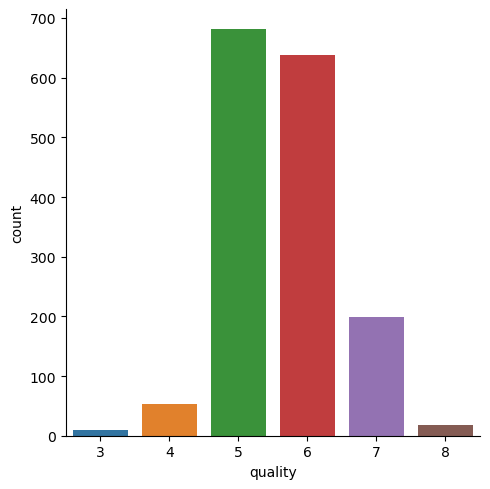

In [52]:
sns.catplot(x= 'quality', data= wine_df, kind= 'count' )

<Axes: xlabel='quality', ylabel='volatile acidity'>

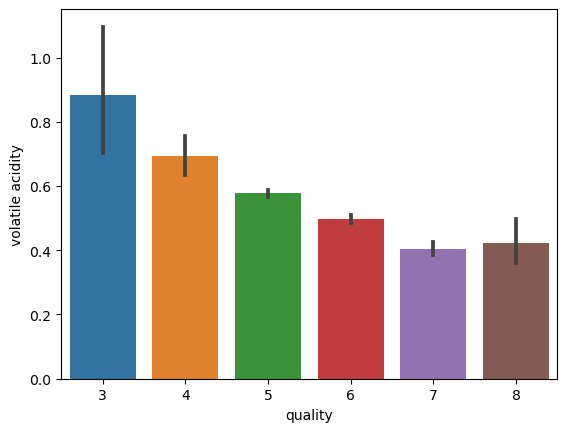

In [60]:
sns.barplot(x='quality',y='volatile acidity', data= wine_df )

<Axes: xlabel='quality', ylabel='citric acid'>

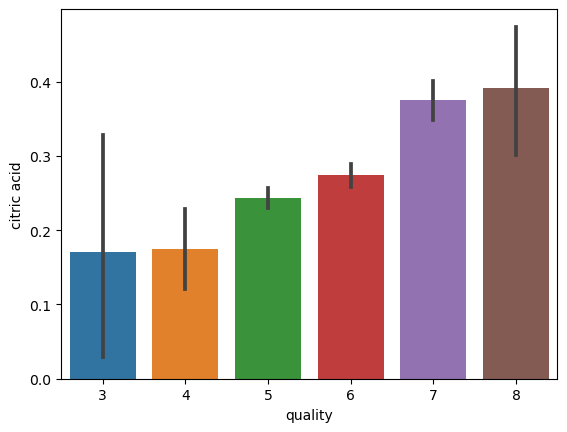

In [61]:
sns.barplot(x='quality',y='citric acid', data= wine_df )

<Axes: xlabel='quality', ylabel='residual sugar'>

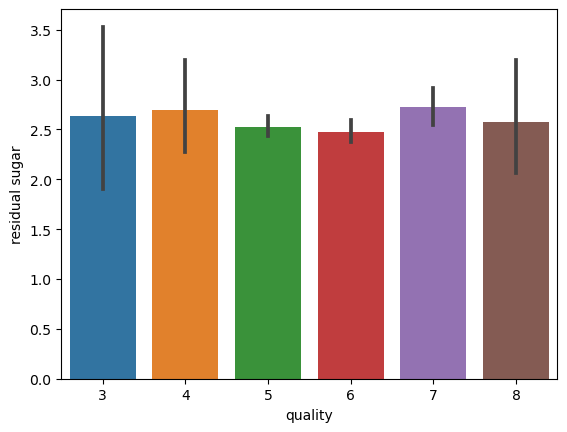

In [62]:
sns.barplot(x='quality',y='residual sugar', data= wine_df )

<Axes: xlabel='quality', ylabel='alcohol'>

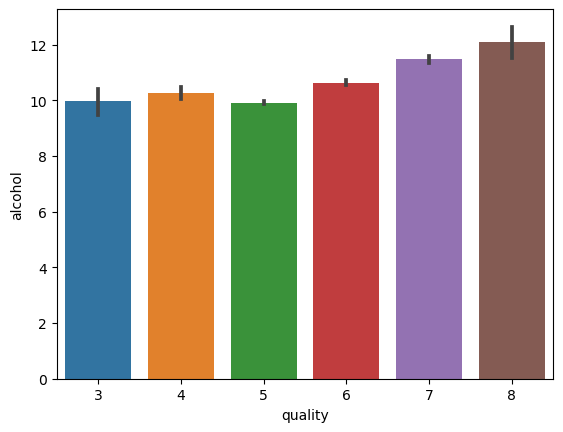

In [64]:
sns.barplot(x='quality',y='alcohol', data= wine_df )

## Correlation between columns 

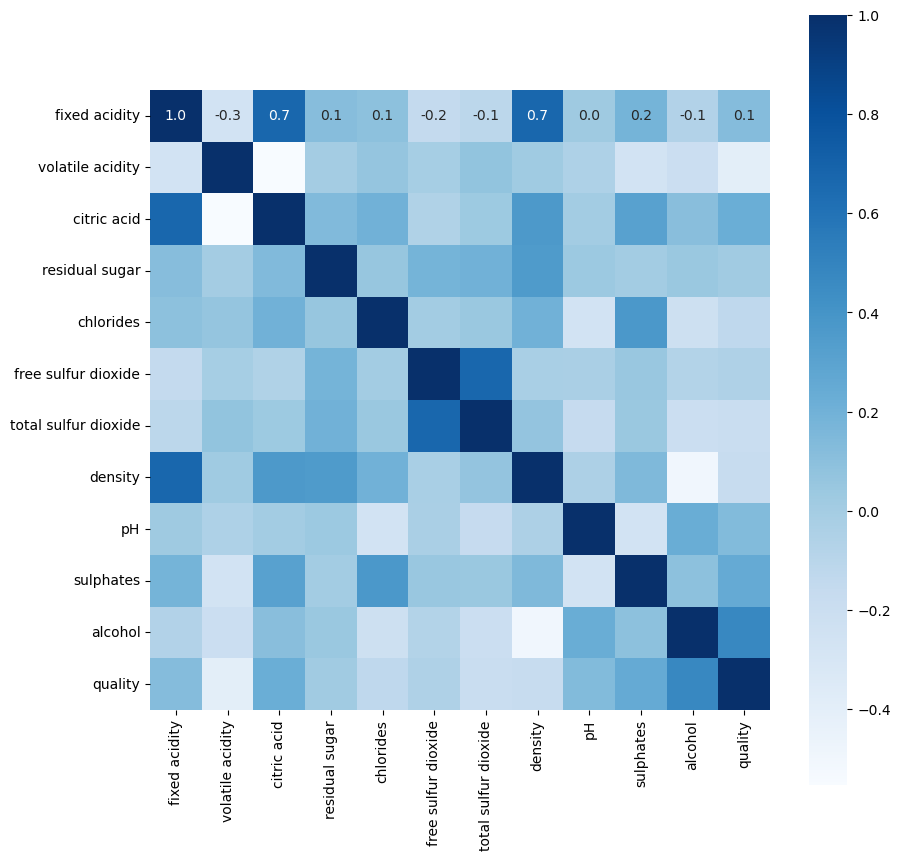

In [80]:
co_rel= wine_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(co_rel,cbar= True, square= True,annot=True, cmap= 'Blues', fmt='.1f'  )
plt.show()


In [84]:
X = wine_df.drop('quality',axis=1)
X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [85]:
Y = wine_df['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)

In [86]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [98]:
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [99]:
X_test.shape

(320, 11)

In [100]:
X_train.shape

(1279, 11)

In [101]:
y_test.shape

(320,)

In [102]:
y_train.shape

(1279,)

## Model training 



In [103]:
model= RandomForestClassifier()

In [104]:
model.fit(X_train,y_train)

RandomForestClassifier()

## Model Evaluation 

Accuracy Score

In [105]:
X_test_pred = model.predict(X_test)

In [106]:
X_test_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [107]:
test_accuracy= accuracy_score(X_test_pred, y_test )

In [108]:
print('Accuracy of the model is:',test_accuracy)

Accuracy of the model is: 0.9125


In [112]:
import pickle
with open('model_wine_pickle','wb') as f:
  pickle.dump(model,f)

    



In [115]:
with open('model_wine_pickle','rb') as f:
 mp = pickle.load(f)

In [121]:
data=[(7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4)]
data = np.array(data).reshape(1,-1)
prediction= mp.predict(data)
prediction


D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)